In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Uber-Trip-Analysis -> Forecasting
##Objective:
To perform basic time-series analysis and generate simple forecasts for future Uber trip demand.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/uberTripAnalysis/data/cleaned.csv')

In [17]:
df['date'] = pd.to_datetime(df['date'])

In [18]:
daily = df.groupby('date')['trips'].sum().to_frame()

In [19]:
daily = daily.asfreq('D')

In [20]:
daily = daily.asfreq('D').fillna(0)

In [21]:
daily

,trips
date,
2015-01-01,56437
2015-01-02,39189
2015-01-03,58449
2015-01-04,40798
2015-01-05,42752
2015-01-06,52426
2015-01-07,62102
2015-01-08,71413
2015-01-09,70296


<Axes: xlabel='date'>

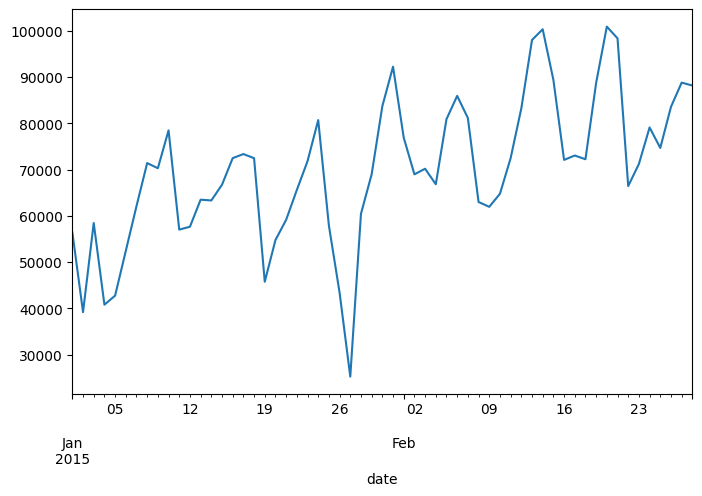

In [23]:
daily['trips'].plot(figsize = (8,5))

In [24]:
daily['ma7'] = daily['trips'].rolling(7).mean()

<Axes: xlabel='date'>

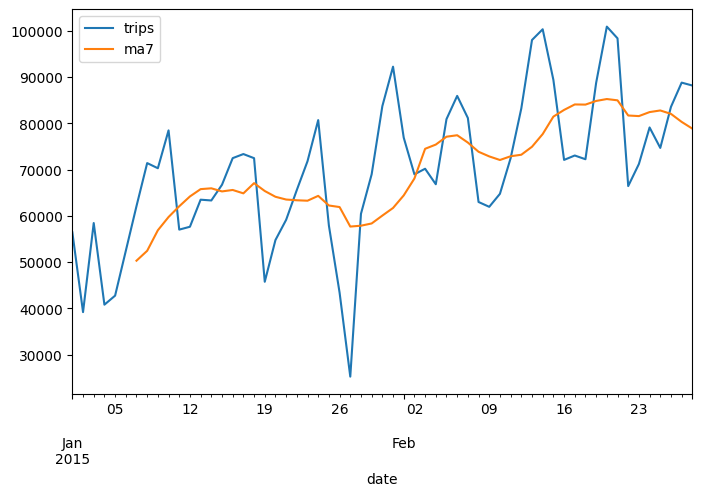

In [25]:
daily[['trips','ma7']].plot(figsize = (8,5))

In [26]:
forecast_next_day = daily['trips'].tail(7).mean()

In [28]:
forecast_next_day

np.float64(78859.71428571429)

In [29]:
forecast_next_week = daily['trips'].tail(7).mean()*7

In [30]:
forecast_next_week

np.float64(552018.0)

**We converted Uber trip activity into a daily time-series, applied moving averages to smooth fluctuations, and generated simple baseline forecasts for future trip demand.**